In [1]:
!pip install imbalanced-learn

In [4]:
!pip install --upgrade numpy pandas


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 178.6 kB/s eta 0:01:05
   ---------------------------------------- 0.1/11.6 MB 262.6 kB/s eta 0:00:45
   ---------------------------------------- 0.1/11.6 MB 364.4 kB/s eta 0:00:32
   ---------------------------------------- 0.1/11.6 MB 379.3 kB/s eta 0:00:31
   ---------------------------------------- 0.1/11.6 MB 379.3 kB/s eta 0:00:31
   ---------------------------------------- 0.1/11.6 MB 379.3 kB/s eta 0:00:31
   ---------------------------------------- 0.1/11.6 MB 379.3 kB/s eta 0:00:31
    --------------------------------------- 0.2/11.6 MB 318.1 kB/s eta 0:00:37
    --------------------------------------- 0.2/11.6 MB 318.1 kB/s eta 0:00:37
    -----

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 2.0.0 which is incompatible.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.2.2 which is incompatible.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.13.1 which is incompatible.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.0.0 which is incompatible.


In [5]:
pip install numpy==1.24


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB 320.0 kB/s eta 0:00:47
   ---------------------------------------- 0.0/14.8 MB 262.6 kB/s eta 0:00:57
   ---------------------------------------- 0.0/14.8 MB 262.6 kB/s eta 0:00:57
   ---------------------------------------- 0.0/14.8 MB 262.6 kB/s eta 0:00:57
   ---------------------------------------- 0.0/14.8 MB 140.3 kB/s eta 0:01:46
   ---------------------------------------- 0.0/14.8 MB 140.3 kB/s eta 0:01:46
   ---------------------------------------- 0.1/14.8 MB 163.6 kB/s eta 0:01:31
   ---------------------------------------- 0.1/14.8 MB 227.6 kB/s eta 0:01:05
   ---------------------------------------- 0.1/14.8 MB 261.9 kB/s eta 0:00:57
   ---------------------------------------- 0.1/14.8 MB 261.9 kB/s eta 0:00:57
   ---------------------------------------- 0.1/14.8 MB 261.9 kB/s eta

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.24.0 which is incompatible.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.2.2 which is incompatible.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.13.1 which is incompatible.
seaborn 0.12.2 requires numpy!=1.24.0,>=1.17, but you have numpy 1.24.0 which is incompatible.


In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Example data
data = {
   'text': ['This is a sample text.', np.nan, 'Another sample text.', 'Text data with missing values.', None]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Replace np.nan and None values with empty strings
df['text'] = df['text'].fillna('')

# Extract the 'text' column as the features
features = df['text']

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer()
features_vectorized = tfidf.fit_transform(features)

print(features_vectorized)


  (0, 6)	0.5680140774328015
  (0, 2)	0.5680140774328015
  (0, 4)	0.45827018116532225
  (0, 5)	0.38040564760664297
  (2, 4)	0.5568161504458247
  (2, 5)	0.46220770413113277
  (2, 0)	0.6901592662889633
  (3, 5)	0.31752680284846835
  (3, 1)	0.4741246485558491
  (3, 8)	0.4741246485558491
  (3, 3)	0.4741246485558491
  (3, 7)	0.4741246485558491


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19461 entries, 0 to 19460
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             19461 non-null  object
 1   labels           19461 non-null  int64 
 2   cleaned_comment  19420 non-null  object
dtypes: int64(1), object(2)
memory usage: 456.2+ KB
                                                text  labels  \
0  <user> thanks for showing up for our appointme...       1   
1                                      haha .  # lol       1   
2  i love waiting <num> min for a cab - such shor...       1   
3  22 super funny quotes # funnyquotes  # funnysa...       1   
4            goog morning  # sorrynotsorry # morning       1   

                                     cleaned_comment  
0              user thanks showing appointment today  
1                                           haha lol  
2  love waiting num min cab shortage user please ...  
3  22 supe

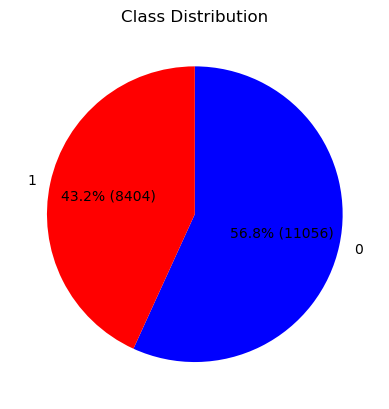

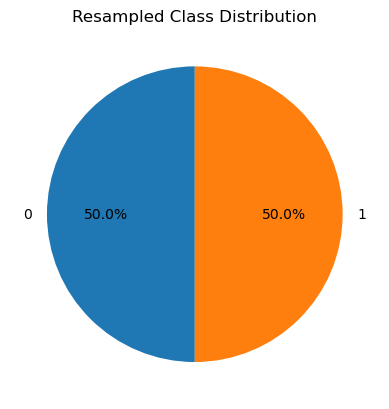

In [16]:

# Load the dataset
file_path = 'processed_data2.csv'
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info()
print(df.head())

# Examine class distribution
label_counts = df['labels'].value_counts(normalize=True)
print(label_counts)

# Plot class distribution as a pie chart
label_counts.plot.pie(autopct=lambda pct: f'{pct:.1f}% ({int(pct * len(df) / 100)})', colors=['blue', 'red'], startangle=90, counterclock=False)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

# Handle missing values in 'cleaned_comment' column
df['cleaned_comment'] = df['cleaned_comment'].fillna('')

# Separate features and labels
features = df['cleaned_comment']
labels = df['labels']

# Shuffle the data to ensure each chunk gets a mix of classes
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
features = df['cleaned_comment']
labels = df['labels']

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer()
features_vectorized = tfidf.fit_transform(features)

# Function to generate data chunks
def chunk_data(data, target, size):
    for start in range(0, data.shape[0], size):
        yield data[start:start + size], target[start:start + size]

# Define chunk size based on available memory
chunk_size = 1000  # Adjust according to your system's memory capacity

smote = SMOTE(random_state=42)
features_resampled_list = []
labels_resampled_list = []

for X_chunk, y_chunk in chunk_data(features_vectorized, labels, chunk_size):
    # Ensure X_chunk and y_chunk have the same number of samples
    if X_chunk.shape[0] != y_chunk.shape[0]:
        raise ValueError(f"Mismatch in number of samples: {X_chunk.shape[0]} in X_chunk, {y_chunk.shape[0]} in y_chunk")

    # Check if chunk contains more than one class
    if len(np.unique(y_chunk)) > 1:
        X_res, y_res = smote.fit_resample(X_chunk, y_chunk)
        features_resampled_list.append(X_res)
        labels_resampled_list.append(y_res)

# Combine all chunks back together
features_resampled = vstack(features_resampled_list)
labels_resampled = np.hstack(labels_resampled_list)

# Visualize the resampled class distribution
resampled_counts = pd.Series(labels_resampled).value_counts(normalize=True)
resampled_counts.plot.pie(autopct='%1.1f%%', startangle=90, title='Resampled Class Distribution')
plt.ylabel('')
plt.show()
